In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [3]:
just_data = new_data.ix[:,:11].values

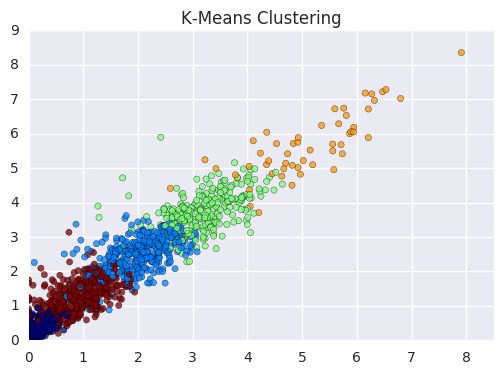

In [23]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,1],
            alpha=0.75, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means Clustering')

In [5]:
pd.DataFrame(just_data[:,:]).head()
Predict = pd.DataFrame(group)

In [6]:
Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])
GeneID_Predict.head()

,0,1
0,30786,3
1,865,2
2,34129,3
3,81016,3
4,34829,3


In [7]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [8]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values